# Task 3

Nord Pool consists of the commercial power exchange function, Nord Pool, and the Market Couopling Operator function, Nord Pool European Market Coupling Opertator.   
Nord Pool is Europe's leading power market and offers trading, clearing, settlement and associated services in both day-ahead and intraday markes across 16 European countries.   
Their product includes power price produced within their markets every hour, every day.  

## Subtask 3.3

# Countries/Cities:
Norway - Oslo  
Norway - Trondheim  
Norway - Bergen  
Norway - Kristiansand  
Norway - Tromsø  
Sweden - Stockholm  
Sweden - Malmö  
Finland - NA  
Denmark - NA  
France - NA  

In [241]:
# imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

For this task we have gathered day-ahead power price data from Nord Pool.  
We selected the following datasets:
- 2022 - Weekly data for October (26.09 - 06.11)
- 2022 - Hourly data for the 13th of November  

In [242]:
# Weekly data for weeks 39-44 (26.09 - 06.11)

weekly_data_october_data_frame = pd.read_csv(
    "data/task_3_data/weekly_data_october_2022.csv"
)

# Hourly data for the 13th of November

hourly_data_november_13_data_frame = pd.read_csv(
    "data/task_3_data/hourly_data_november_13_2022.csv"
)

# Visualization of october-data

weekly_data_october_data_frame

,Oslo,Trondheim,Bergen,Kristiansand,Tromsø,Stockholm,Malmö,Finland,Denmark,France
39 - 22,243.37,61.11,243.56,243.37,31.90,106.25,106.25,241.46,265.67,307.42
40 - 22,93.00,24.83,93.00,93.23,19.97,59.64,59.64,79.97,98.73,245.38
41 - 22,167.02,15.91,167.02,168.81,14.57,62.58,62.58,69.80,205.99,224.31
42 - 22,139.61,45.65,139.61,139.61,18.73,96.55,96.55,137.61,146.16,148.90
43 - 22,104.72,41.12,104.72,104.28,20.45,67.82,67.83,120.81,107.17,107.74
44 - 22,73.53,31.55,73.53,73.71,18.30,55.03,67.70,111.02,84.90,129.73


The given task is to convert the aformentioned data to Series/DataFrames, and to use this data for analysis.  

The focus of said analysis will be on:  
- How power-prices differ between European countries  
- How power-prices differ between cities in Norway  
- How power-prices fluctuate by the hour in these countries/cities

A good place to start is to visualize the overall differances between the power-prices of European countries with a diagram:  

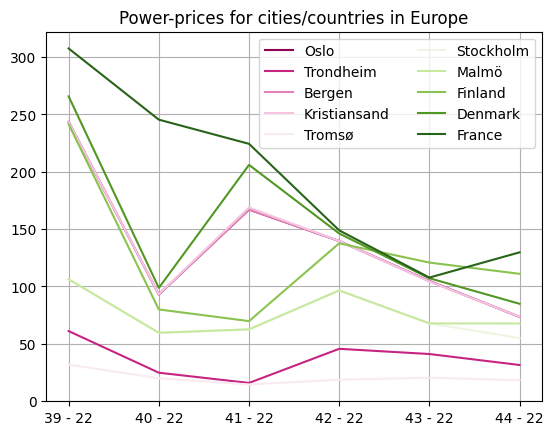

In [ ]:
# Defining the plot and visual elements

plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.PiYG(np.linspace(0, 1, 10))
)

norge_df = weekly_data_october_data_frame.iloc[:, :5]
europa_df = weekly_data_october_data_frame.iloc[:, 5:]

plt.plot(weekly_data_october_data_frame)
plt.legend(weekly_data_october_data_frame, ncol=2)
plt.title("Power-prices for cities/countries in Europe")
plt.grid()
plt.show()

As we can see there are large variations between the power-prices across countries, that seem to converge as the weeks progress.  

There also seems to be a correlation between subsets of data within the dataset. Lets take a deeper look at the different countries/cities apart from Norway:

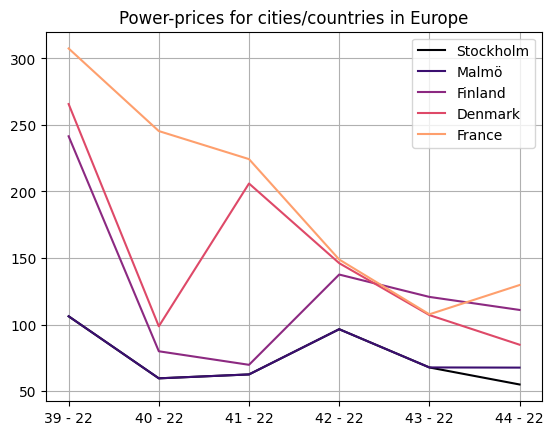

In [244]:
# Defining the plot and visual elements

plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.magma(np.linspace(0, 0.8, 5))
)

plt.plot(europa_df)
plt.legend(europa_df)
plt.title("Power-prices for cities/countries in Europe")
plt.grid()
plt.show()

As Stockholm and Malmö have almost identical readings, we'll treat them as a uniform "Sweden".  

Given this diagram we can see that Sweden on average has the lowest power-price, while France obviousely has the highest.  

There are a few interesting trends in the data-set to consider:
- Price by geography
- Overall cost consistency
- The correlations between the two trends

Lets examine:

In [245]:
# Merging cities into a common country-column

condensed_europa_df = europa_df.copy()
condensed_europa_df["Sweden"] = europa_df["Malmö"] + europa_df["Stockholm"]
condensed_europa_df.drop(["Malmö", "Stockholm"], axis=1, inplace=True)
condensed_europa_df["Sweden"] = condensed_europa_df["Sweden"].div(2).round(2)

# Calculating the average power-price for the different countries

europa_mean = condensed_europa_df.mean().sort_values().round(2)
print(
    f"The cheapest power-price is found in {europa_mean.keys()[0]} with an average price of {europa_mean[0]} EUR/MWh"
)
print(
    f"The most expensive power-price is found in {europa_mean.keys()[-1]} with an average price of {europa_mean[-1]} EUR/MWh"
)

The cheapest power-price is found in Sweden with an average price of 75.7 EUR/MWh
The most expensive power-price is found in France with an average price of 193.91 EUR/MWh


In [246]:
# Calculating the consistency of power-price for the different countries

europa_differance = condensed_europa_df.max() - condensed_europa_df.min()

europa_differance = europa_differance.sort_values()

print(
    f"The most consistent power-price is found in {europa_differance .keys()[0]} with a range of {europa_differance [0]} EUR/MWh"
)
print(
    f"The least consistent power-price is found in {europa_differance.keys()[-1]} with a range of {europa_differance [-1]} EUR/MWh"
)

The most consistent power-price is found in Sweden with a range of 46.61 EUR/MWh
The least consistent power-price is found in France with a range of 199.68 EUR/MWh


Given this information, we can see the following: 
- The countries with the lowest power-prices also have the most consistent prices
- Countries that lie further north have lower power-prices

This is intriguing, as a correlation is implied.  

Usually there are two major factors that affect costs in any market: Supply and Demand. 
If we assume that the demand is relatively constant for any specific country, this would mean that the countries with expensive power have either a generally low supply of power proportional to said demand, or inconsistent means of acquiring it.

This would bring us to the following conclusion: That nordic countries in general have a high and consistent supply of power that outweights their demand.

Of course, the given data-set is far to small to give this conclusion sufficient credibility, but it is nonetheless a conclusion dervied from logical reasoning based on the given data.



Lets now compare the different cities of Norway to eachother:

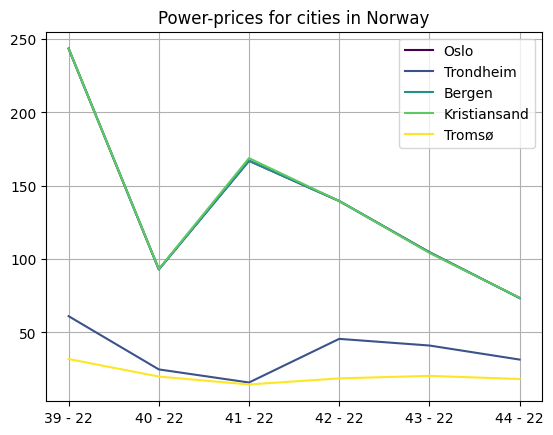

In [264]:
# Defining the plot and visual elements
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.viridis(np.linspace(0, 1, 5))
)

plt.plot(norge_df)
plt.legend(norge_df)
plt.title("Power-prices for cities in Norway")
plt.grid()
plt.show()

Here the discrepancy between power-prices is apparent, as there is a clear distinction between the power-prices of Oslo, Bergen, and Kristiansand, and the other cites.  

As the two distincly cheaper cities, Trondheim and Tromsø have an average power-price of under 30 EUR/MWh, while the three southern cities have an average power-price of over 130 EUR/MWh:  

In [248]:
# Calculating the average power-price of the two apparent subsets

norge_mean = norge_df.mean().sort_values()

north_mean = norge_mean[:2].mean()
south_mean = norge_mean[2:].mean()

print(f"The average power-price of the three southern cities is {round(south_mean, 2)}")
print(f"The average power-price of the two northern cities is {round(north_mean, 2)}")

The average power-price of the three southern cities is 136.98
The average power-price of the two northern cities is 28.67


Based on this data-set, we can therefore conclude that the power-prices are generally cheaper as we move further north in Norway.  

However, as the values converge towards the end of the dataset, we should assume that this may not always be true, as a larger data-set might indicate something else.  

As such we have analyzed the different subsets within our weekly data, and so we'll move on to the daily data to see how much the power-price might fluctuate within the span of a single day:

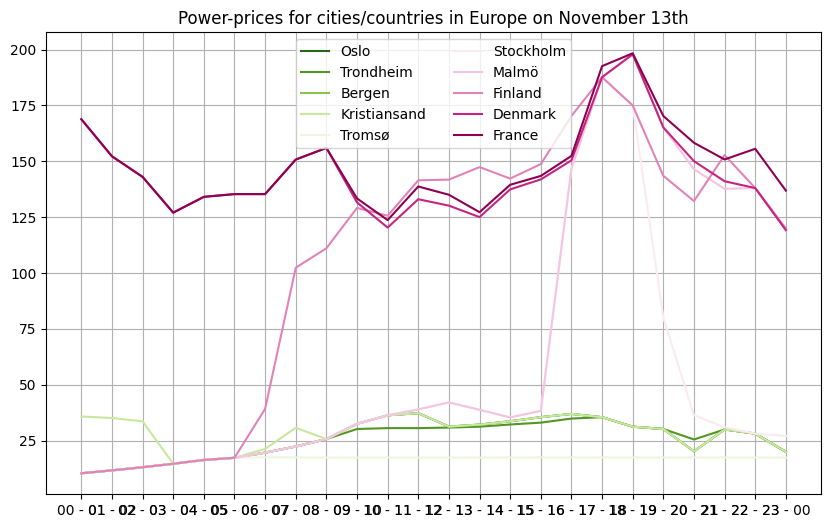

In [263]:
# Defining the plot and visual elements
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    "color", plt.cm.PiYG_r(np.linspace(0, 1, 10))
)

norge_november_df = hourly_data_november_13_data_frame.iloc[:, :5]
europa_november_df = hourly_data_november_13_data_frame.iloc[:, 5:]

plt.figure(figsize=(10, 6))
plt.plot(
    hourly_data_november_13_data_frame,
)
plt.legend(hourly_data_november_13_data_frame, ncol=2)
plt.title("Power-prices for cities/countries in Europe on November 13th")
plt.grid()
plt.show()

When looking at this diagram there are immediately two things that stand out:
- The general differanse between the power-price in Norway and the other countries
- The general fluctuations of the power-price during the day for Norway and the other countries.

As for why, it could be because Norway is largely self-sufficient when it comes to energy, meaning we can sell our power cheaper locally. This could also be the reason the fluctuations are so small within Norway, that because we don't need to rely on other countries for energy, we have a steady and stable supply of it.  

Generally speaking we can also see a trend of higher power-prices during the afternoon, around the same time as energy consumption goes up because of people getting home after work/school, which leads to a rise in demand.